# Demonstration of shifty.py's "known" module
 - 202002XX
 - Payne 
 
There is a "Known" class
 - This handles both data-downloads and operations associated with recovering the signal for a known object

This notebook:
 - ... 

#### Import statements 

In [308]:
# -------------------------------------------------------------------------------------
# Third party imports
# -------------------------------------------------------------------------------------
import numpy as np 
import matplotlib.pyplot as plt
import os, sys
import glob 
import importlib

import astropy
from astropy.io import fits
from astropy.time import Time
from astropy.units import allclose as quantity_allclose
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates.builtin_frames import FK5, ICRS, GCRS, GeocentricMeanEcliptic, BarycentricMeanEcliptic, HeliocentricMeanEcliptic, GeocentricTrueEcliptic, BarycentricTrueEcliptic, HeliocentricTrueEcliptic, HeliocentricEclipticIAU76
from astropy.constants import R_sun, R_earth

# -------------------------------------------------------------------------------------
# Local imports
# -------------------------------------------------------------------------------------
sys.path.append(os.path.join(os.path.split(os.getcwd())[0], 'shifty'))
import known

importlib.reload(known)


<module 'known' from '/home/mikea/GitHub/shifty/shifty/known.py'>

### Instantiate Known object

In [309]:
# creation of Known object
K = known.Known()

# there are probably no instantiated variables ...
print(K.__dict__)

{'local_dir': '/home/mikea/.shifty_data'}


##### Use Known to look at positions of sedna
 - While developing, we'll want to know the position of sedna as a function of time
 - I've downloaded the positions (from JPL Horizons) during Sector-5 as a convenience 

In [310]:
importlib.reload(known)
K = known.Known()

# These are the values from JPL at hourly intervals
JD_, RA_, Dec_  = K._radec_for_sedna()
for t,r,d in zip(JD_[:2], RA_[:2], Dec_[:2]):
    print(t,r,d)
print()

# These are interpolated values at arbitrary times 
times = np.arange(2458436.5, 2458464.5, 7)
RA_, Dec_ = K._interpolate_radec_for_sedna(times)
for t,r,d in zip(times, RA_, Dec_):
    print(t,r,d)
print() 


2458436.5 57.136303009 7.655008551
2458436.541666667 57.135914678 7.654898968

2458436.5 57.136303009 7.655008551
2458443.5 57.065397724 7.638686663
2458450.5 56.9958723 7.624888305
2458457.5 56.925340591 7.61328786



In [313]:
# Some notes on which camera/ccd/etc we expect Sedna to be in 
# - These came from inputing 57.136 7.6549 into lightkurve's tess-cut/tess-search function 
camera = 1 
ccd = 4
col, row = 1550, 1101

(2458445, 2458455)

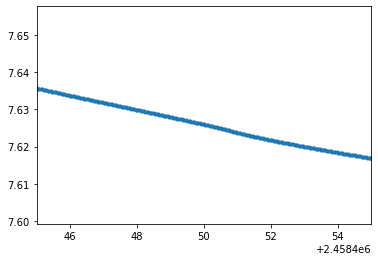

In [314]:
RA_, Dec_ = K._interpolate_radec_for_sedna(JD_)
#plt.plot(JD_, RA_ , '.')
plt.plot(JD_, Dec_ , '.')
plt.xlim([2458445, 2458455])

In [369]:
K.get_known_RADEC(obs_code='000', times=times, object_name='101583')

In [370]:
K.RA

array([59.88447843, 58.23191998, 56.55265927, 54.9510077 ])

In [372]:
RA_

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
       57.13262794, 57.13220421, 57.13178061, 57.13135765, 57.13093574,
       57.13051526,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
       57.12219465, 57.12177008, 57.12134616, 57.12092335, 57.12050198,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan, 57.11216256,
       57.11173716, 57.11131246, 57.11088888, 57.11046678,         nan,
               nan,         nan,         nan,         nan,      

In [375]:
DATA_DIR = os.path.join(os.path.dirname(
                        os.path.realpath('.')), 'dev_data')

def _interpolate_radec(times, inputJRD):
    '''
        Interpolate the RA & Dec at the input times
        input:
        times - array of times for output
        inputJRD - tuple of JD_, RA_ and Dec_ of data for interpolation
    '''

    JD_, RA_, Dec_ = inputJRD

    # Interpolate the RA & Dec at the input times
    return np.interp(times, JD_, RA_), np.interp(times, JD_, Dec_)


def _radec_from_file(obj='sedna', obs_code='C57'):  # Thus also works for 101583
    filename = obj + '_ephem_' + obs_code + '.txt'
    JD_, RA_, Dec_ = np.genfromtxt(os.path.join(DATA_DIR, filename),
                                   delimiter=(17, 5, 13, 13), 
                                   usecols=(0, 2, 3), unpack=True)
    
    return JD_, RA_, Dec_



In [376]:
_interpolate_radec(times, _radec_from_file('sedna'))

(array([57.13630301, 57.06539772, 56.9958723 , 56.92534059]),
 array([7.65500855, 7.63868666, 7.6248883 , 7.61328786]))

In [377]:
_interpolate_radec(times, _radec_from_file('101583'))

(array([59.85622757, 58.17564403, 56.55023554, 54.88443379]),
 array([8.53715154, 8.1772754 , 7.93612752, 7.80394991]))

In [378]:
ii

(array([57.13630301, 57.06539772, 56.9958723 , 56.92534059]),
 array([7.65500855, 7.63868666, 7.6248883 , 7.61328786]))

In [379]:
K.RA

array([59.88447843, 58.23191998, 56.55265927, 54.9510077 ])

In [380]:
K.Dec

array([8.51869996, 8.1736283 , 7.92677384, 7.79756144])

In [381]:
RA_, Dec_ = K._interpolate_radec_for_sedna(times)

In [382]:
RA_

array([57.13630301, 57.06539772, 56.9958723 , 56.92534059])

In [383]:
K.RA

array([59.88447843, 58.23191998, 56.55265927, 54.9510077 ])

In [384]:
times

array([2458436.5, 2458443.5, 2458450.5, 2458457.5])

In [385]:
K.RA

array([59.88447843, 58.23191998, 56.55265927, 54.9510077 ])

In [386]:
K.times

array([2458436.5, 2458443.5, 2458450.5, 2458457.5])

In [387]:
horizons_query = Horizons(id='101583', location='000',
                          epochs=times, id_type='smallbody')
horizons_ephem = horizons_query.ephemerides(extra_precision=True)

In [388]:
horizons_ephem['RA']

59.884478428
58.231919979
56.552659274
54.951007696


In [389]:
K.RA

array([59.88447843, 58.23191998, 56.55265927, 54.9510077 ])

In [390]:
K.Dec

array([8.51869996, 8.1736283 , 7.92677384, 7.79756144])

In [391]:
filename = '101583_ephem_000.txt'
np.genfromtxt(os.path.join(DATA_DIR, filename),
              usecols=(0, 2, 3), delimiter=(17, 5, 13, 13), unpack=True)

array([[2.45843650e+06, 2.45843654e+06, 2.45843658e+06, ...,
        2.45846642e+06, 2.45846646e+06, 2.45846650e+06],
       [5.98844784e+01, 5.98746587e+01, 5.98648441e+01, ...,
        5.31821129e+01, 5.31745500e+01, 5.31670140e+01],
       [8.51869996e+00, 8.51640067e+00, 8.51409375e+00, ...,
        7.82414758e+00, 7.82478790e+00, 7.82542407e+00]])